In [1]:
import sys

PWD = '..'
sys.path.append(PWD)

import numpy as np
from scipy import signal
from scipy.ndimage import filters

from matplotlib import pyplot as plt

from src.plot_utils import plot_sample
from src.cfd import CFD

In [2]:
cfd = CFD()

# Load data

In [3]:
file_name = 'Ntuple_runsampic_166_runtelescope_643.npz'
all_events = np.load(f'{PWD}/data/{file_name}', allow_pickle=True)['arr_0'].flat[0]

all_events.keys()

dict_keys([11, 23, 16, 24, 29, 28, 17, 22, 12, 10])

In [4]:
events = all_events[24]

events.keys()

dict_keys(['sample_channel', 'eventIDSampic', 'sample_time', 'sample_ampl'])

# Tests (single event)

In [5]:
i_event = 5676

print(f"Sampic event: {events['eventIDSampic'][i_event]}")
print(f"Channels: {events['sample_channel'][i_event]}")

event_channel = events['sample_channel'][i_event]

Sampic event: 528976
Channels: [ 0 24]


In [6]:
event_ampl = events['sample_ampl'][i_event]

# event_time = events['sample_time'][i_event]
event_time = np.tile(np.arange(64), (len(event_ampl), 1))

event_ampl.shape, event_time.shape

((2, 64), (2, 64))

In [7]:
baseline = 20
event_threshold = np.std(event_ampl[:, :baseline], axis=1) * 6
event_hysteresis = event_threshold / 100

event_cfd_timestamps = []
for i in range(len(event_ampl)):
    ampl = event_ampl[i]
    timestamp = cfd.predict(ampl)
    event_cfd_timestamps.append(timestamp)
    
print(event_cfd_timestamps)

[30.225237656236953, 33.358010803061376]


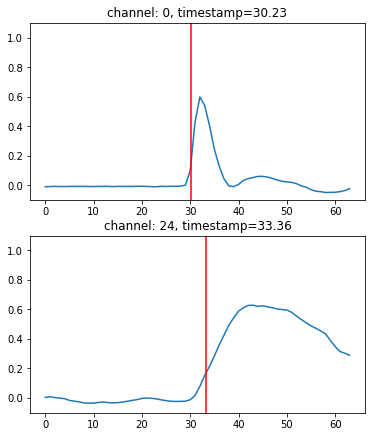

In [8]:
plt.figure(figsize=(6, 15))
for i, (ampl, time, timestamp, channel) in enumerate(zip(event_ampl, event_time, event_cfd_timestamps, event_channel)):
    plt.subplot(4, 1, i + 1)
    plot_sample(ampl, title=f'channel: {channel}', timestamp=timestamp, ylim=True)

# Tests (a few events)

In [9]:
i_channel = 24
    
selected_events = [0, 2000, 4001, 8273]

In [10]:
def calculate_event_cfd(i_event, baseline=20):
    event_ampl = events['sample_ampl'][i_event]

    event_cfd_timestamps = []
    for i in range(len(event_ampl)):
        ampl = event_ampl[i]

        print('    sample', i)
        timestamp = cfd.predict(ampl, log=True)
        event_cfd_timestamps.append(timestamp)

    return event_cfd_timestamps

event 0
    sample 0
    sample 1
event 1
    sample 0
    sample 1
event 2
    sample 0
    sample 1
event 3
    sample 0
    sample 1


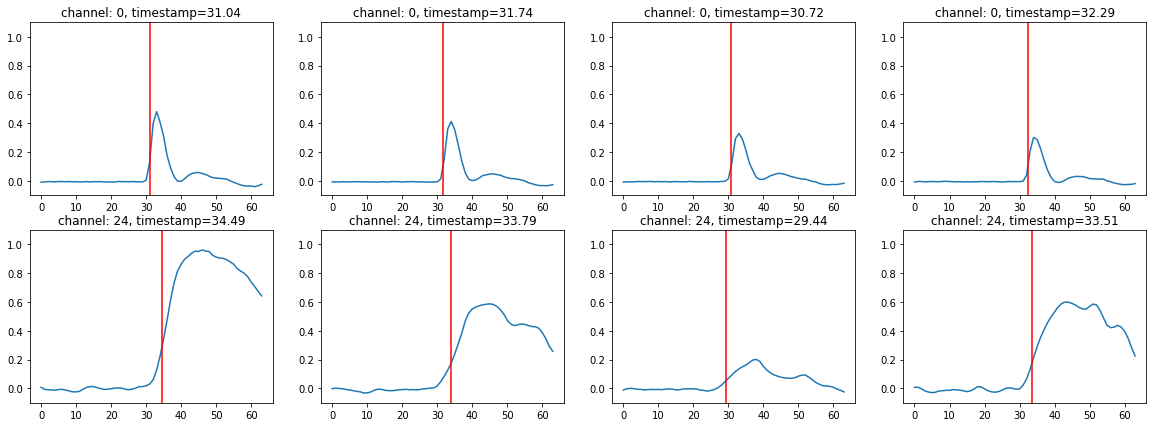

In [11]:
plt.figure(figsize=(20, 7))
for i, i_event in enumerate(selected_events):
    event_channels = events['sample_channel'][i_event]
    event_ampl = events['sample_ampl'][i_event]
    
    print('event', i)
    event_cfd_timestamps = np.array(calculate_event_cfd(i_event))
    
    for j in range(2):
        plt.subplot(2, 4, j * 4 + i + 1)
        plot_sample(event_ampl[j], title=f'channel: {event_channels[j]}', timestamp=event_cfd_timestamps[j], ylim=True)

In [12]:
# events